In [23]:
import numpy as np
from matplotlib import pyplot as plt
import os
from astropy.table import Table
from astropy.wcs import WCS

#NOTES:
#galfit in /Downloads/
#fits files in /Virgo/v0-03Jul2020
#test dir: /WISE_Test/
#sample fits: ~/sample_hyp.fits
             #~/sample_mgs.fits

In [24]:
homedir=os.getenv("HOME")          #yields '/Users/k215c316'

In [25]:
#tabledir = homedir+'WISE_test'
#tableprefix = 'vf_north_v0_subsample_'

In [26]:
#sample of 59 galaxies (SNR > 65, D25 > 50)

vfmain = Table.read(homedir+'/sample_main.fits')
vfz0mgs = Table.read(homedir+'/sample_mgs.fits')
hyptab = Table.read('/Users/k215c316/Virgo/v0-03Jul2020/vf_north_v0_hyperleda.fits')

In [27]:
hyptab[388]

VFID,RA,DEC,NEDname,objname,objtype,de2000,al2000,v,e_v,vopt_1,e_vopt,vrad,e_vrad,bt,e_bt,type_1,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
bytes8,float32,float32,bytes30,bytes28,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes1,bytes1,bytes1,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64
VFID0388,237.85522,62.310036,NGC 6015,NGC6015,G,62.3100354,15.8570152,831.5,2.8,822.0,8.0,832.6,2.6,11.605,0.122,Sc,N,N,M,N,5.9,0.4,1.764,0.023,0.354,0.04,28.0,65.71,1.755,10.928,10.092,-0.141,0.486,12.967,2.039,-20.215,N/A,8.546,0.132,10.116,0.063,11.525,11.17,11.552,0.122,0.101


In [28]:
#I begin with a test of one galaxy from this sample... NGC6015
vfmain[0]
#ra --> 'RA', dec --> 'DEC', size --> 'radius', galname --> 'prefix'

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,prefix,COflag,Z0MGSflag,Steerflag,unwiseflag
,,,,arcsec,,,,,,,,,,,,,,,
bytes8,float32,float32,float32,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes38,bool,bool,bool,bool
VFID0388,237.85522,62.310036,831.5,174.22932,True,NGC6015,632910,146459,0,NGC 6015,True,True,True,False,VFID0388-NGC6015,False,True,True,True


In [29]:
vfz0mgs[0]

cntr_01,dist_x,pang_x,vfid_01,ra_01,dec_01,major_01,pgc_name,pgc,ra,dec,gl_deg,gb_deg,resolution,has_fuv,has_nuv,has_wise1,has_wise2,has_wise3,has_wise4,time_fuv,time_nuv,afuv,anuv,rms_fuv,std_fuv,rms_nuv,std_nuv,rms_wise1,std_wise1,rms_wise2,std_wise2,rms_wise3,std_wise3,rms_wise4,std_wise4,sat_effects_fuv,star_area_fuv,star_flux_fuv,star_flag_fuv,sat_effects_nuv,star_area_nuv,star_flux_nuv,star_flag_nuv,sat_effects_wise1,star_area_wise1,star_flux_wise1,star_flag_wise1,sat_effects_wise2,star_area_wise2,star_flux_wise2,star_flag_wise2,sat_effects_wise3,star_area_wise3,star_flux_wise3,star_flag_wise3,sat_effects_wise4,star_area_wise4,star_flux_wise4,star_flag_wise4,galaxy_mask_overlap,galaxy_overlap_flag,flux_fuv,rms_flux_fuv,std_flux_fuv,flux_nuv,rms_flux_nuv,std_flux_nuv,flux_wise1,rms_flux_wise1,std_flux_wise1,flux_wise2,rms_flux_wise2,std_flux_wise2,flux_wise3,rms_flux_wise3,std_flux_wise3,flux_wise4,rms_flux_wise4,std_flux_wise4,dist_mpc,e_dist_dex,mtol,method_mtol,logmass,e_logmass,logsfr,e_logsfr,method_sfr,deltams,absbtc,complete_sample,summary_url,Z0MGSflag
,arcsec,deg,,,,,,,deg,deg,deg,deg,,,,,,,,s,s,mag,mag,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,,,,,,,,,,,,,,,,,,,,,,,,,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Mpc,'dex',solMass / solLum,,log(solMass),'dex',log(solMass/yr),'dex',,'dex',mag,,,
int64,float64,float64,bytes8,float64,float64,float64,bytes10,int64,float64,float64,float64,float64,bytes7,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes8,float64,float64,float64,float64,bytes9,float64,float64,int64,bytes61,bool
389,0.033475,91.848845,VFID0388,237.85522461,62.310035706,10.0,PGC56219,56219,237.85524,62.310036,95.692337,44.124603,gauss15,1,1,1,1,1,1,118.8,126.8,0.107,0.107,0.00025397,0.00038812,0.00025097,0.015756,0.00255,0.92126,0.00254,0.69291,0.0086381,0.14386,0.062698,0.09524,0,0.0,0.0,0,0,0.041,0.016,0,0,0.07,0.096,0,0,0.053,0.075,0,0,0.025,0.004,0,0,0.0,0.0,0,0.0,0,0.013648,8.8469e-06,1.2275e-05,0.016817,8.6358e-06,0.00036022,0.1739,3.3002e-05,0.021479,0.10966,4.9278e-05,0.01847,0.43752,0.00046928,0.0041269,0.5865,0.0017714,0.0026908,15.2,0.125,0.343,SSFRLIKE,9.95,0.11,-0.16,0.2,FUV+WISE4,-0.02,-19.981,1,"<a href=""/data/WISE/z0MGS/images/PGC56219.html"">Summary</a>",True


In [30]:
vfmain['RA'][0]

237.85522

# Load wisesize code
- set current directory (spot to which we can save outputs)

In [31]:
os.chdir(homedir+'/WISE_test')

In [32]:
%run ~/virgowise/wisesize.py

In [33]:
g = galaxy(vfmain['RA'][0], vfmain['DEC'][0], vfmain['radius'][0], name = vfmain['prefix'][0], band='3')

In [34]:
t = g.get_wise_image()

wise image size =  348
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85522&dec=62.31004&size=348&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']


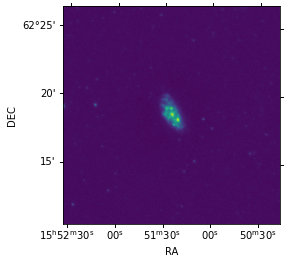

In [35]:
#TEST --> DO NOT REPRODUCE FOR EVERY GALAXY.

wimage,wheader = fits.getdata(g.image, header=True)
wcs = WCS(wheader)
plt.figure()
plt.subplot(projection=wcs)
plt.imshow(wimage,origin='lower')
plt.xlabel('RA')
plt.ylabel('DEC')

In [36]:
g.set_image_names()
g.getpix()
g.initialize_galfit(convflag=False)

self.psfimage =  /Users/k215c316/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits


In [37]:
g.set_sersic_manual(n=2,m=7,re=5,BA=1,PA=0)

In [38]:
#unsure about the "appears like galfit did not complete" error --> could not find print statement in code
#prevents output file required for g.write_results()
g.run_galfit_wise(fitBA=1,fitPA=1)

sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0388-NGC6015-unwise-w3-galfit.input.1Comp
appears like galfit did not complete


In [39]:
g.write_results(printflag=True)

FileNotFoundError: [Errno 2] No such file or directory: 'VFID0388-NGC6015-unwise-w3-1Comp-galfit-out.fits'

In [ ]:
g.get_galfit_results()

In [ ]:
os.chdir(homedir+'/WISE_test/')

In [ ]:
%run ~/github/virgowise/wisesize.py
g  = galaxy(vfmain['RA'][0], vfmain['DEC'][0], vfmain['radius'][0], name = vfmain['prefix'][0], band='3')
g.run_simple(convflag=False)